# Time Series Analysis in Python – A Comprehensive Guide with Examples
https://www.machinelearningplus.com/time-series/time-series-analysis-python/
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

by Selva Prabhakaran

Starter project code for students taking Udacity ud120 https://github.com/selva86/python-machine-learning

A collection of datasets of ML problem solving: https://github.com/selva86/datasets

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [29]:
import seaborn as sns

In [2]:
# You can also dynamically change the default rc settings in a python script or interactively from the python shell. 
# All of the rc settings are stored in a dictionary-like variable called matplotlib.rcParams, 
# which is global to the matplotlib package. rcParams can be modified directly
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

## 1- Import as Dataframe + use date as index

In [8]:
# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [9]:
# Import data in pandas dataframe with date as index:
df_diabetic = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], 
                  index_col='date')
df_diabetic.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


## 2- Import Panel: explanaratory variables that can be helpful in predicting Y

In [5]:
# Panel = explanatory variables that can be helpful in predicting the Y.
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df_mkt_arrivals = df.loc[df.market=='MUMBAI', :]
df_mkt_arrivals.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 3- Visualizing Time Series

### Simple Time Series Plot

In [6]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    # plt.gca(): Get the current Axes, creating one if necessary.
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

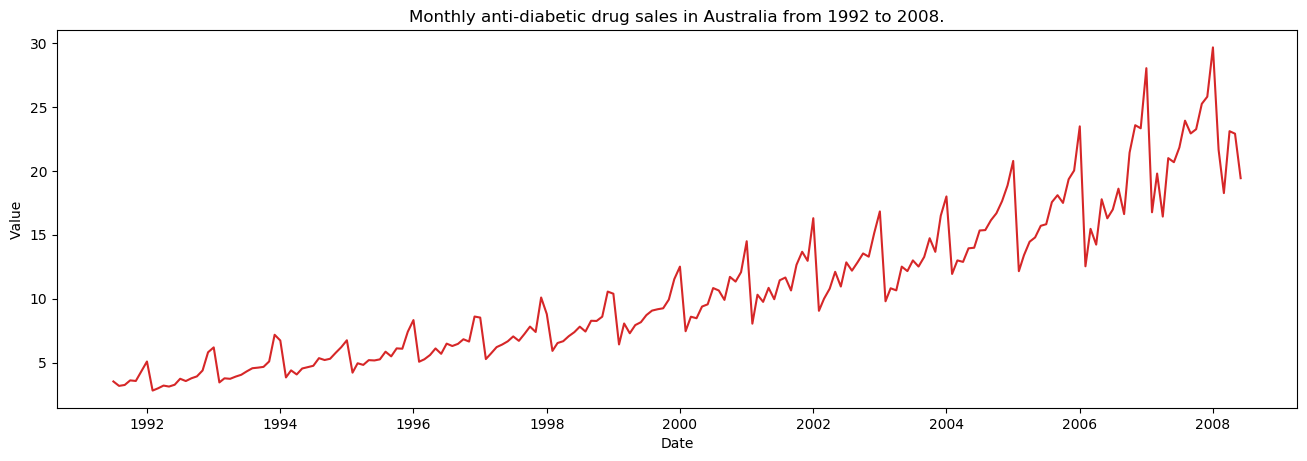

In [10]:
plot_df(df_diabetic, x=df_diabetic.index, y=df_diabetic.value, 
        title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')    

### 2 Sides View Plot

In [11]:
# Draw 2 sides view plot...
df_air_passengers = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', 
                                parse_dates=['date'])
df_air_passengers.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
x = df_air_passengers['date'].values
y1 = df_air_passengers['value'].values

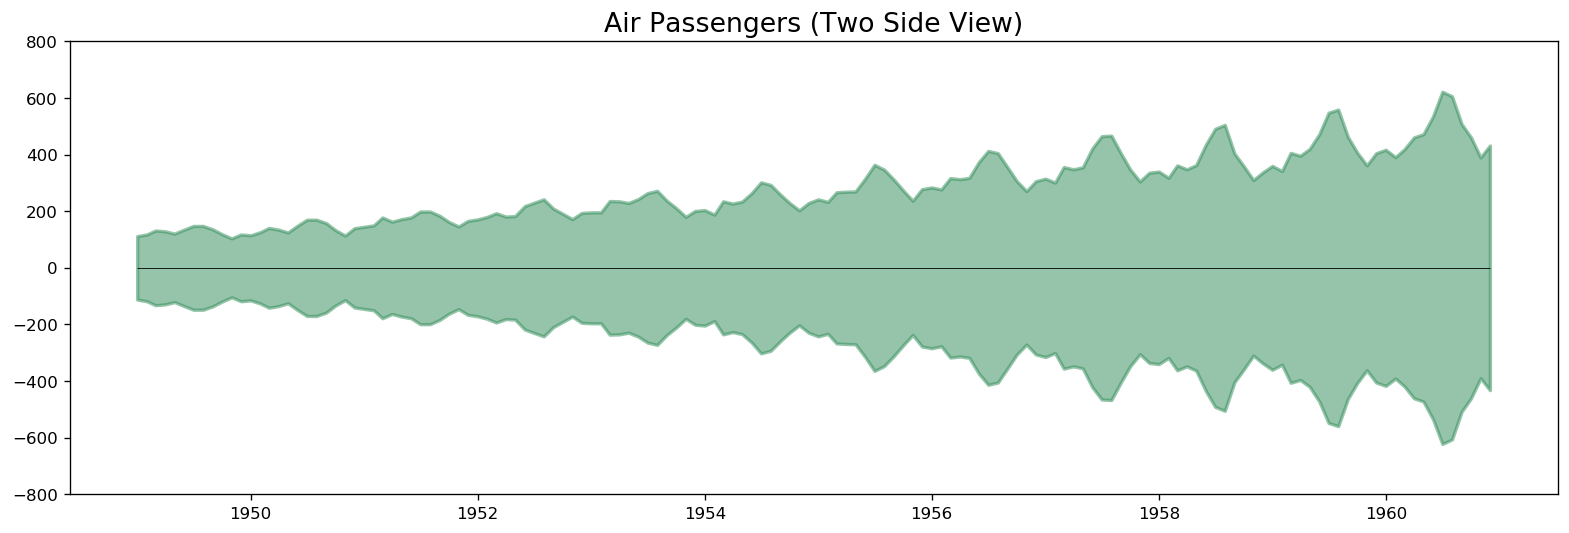

In [14]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
# plt.fill_between: Fill the area between two horizontal curves. The curves are defined by the points (x, y1) and (x, y2). 
# This creates one or multiple polygons describing the filled area. 
# You may exclude some horizontal sections from filling using where.
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_air_passengers.date), xmax=np.max(df_air_passengers.date), linewidth=.5)
plt.show()

### Time 0 Plot - Year distribution for different Years

In [16]:
# For time series that follows a certain repetitive pattern every year, you can plot each year as a separate line 
# in the same plot. This lets you compare the year wise patterns side-by-side. Seasonal Plot of a Time Series
df_diabetic['year'] = [d.year for d in df_diabetic.index]
df_diabetic['month'] = [d.strftime('%b') for d in df_diabetic.index]
years = df_diabetic['year'].unique()

In [26]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

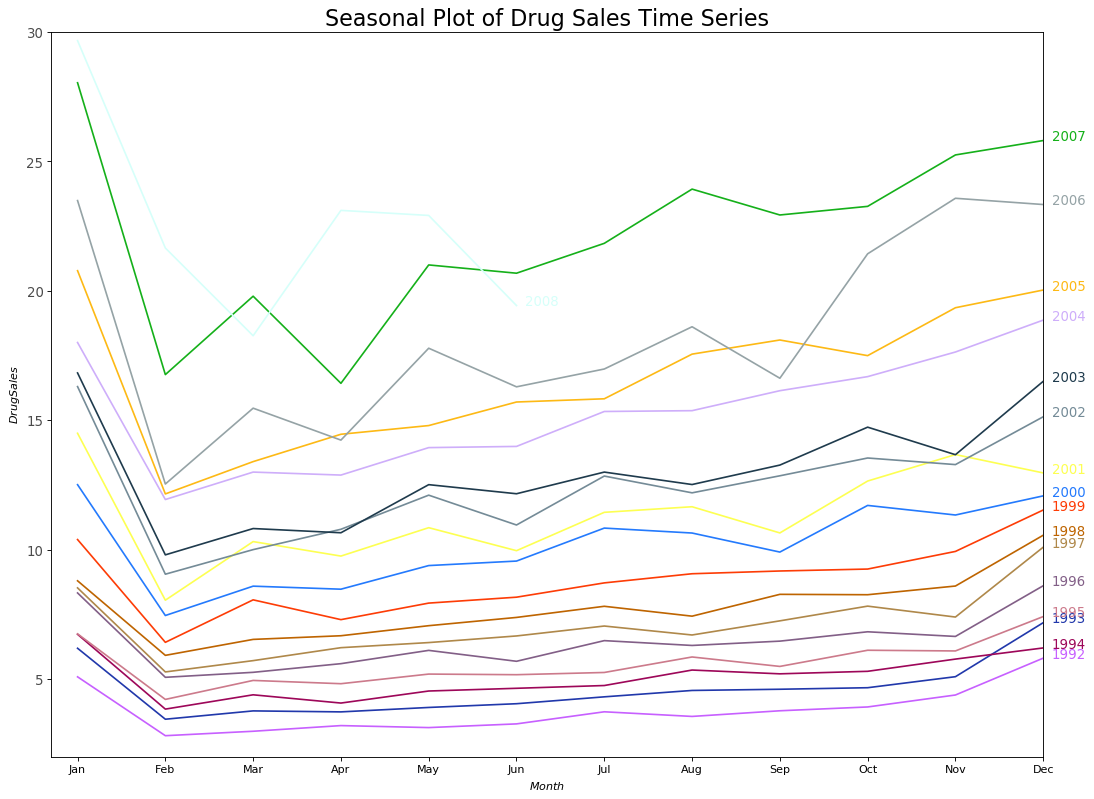

In [28]:
# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df_diabetic.loc[df_diabetic.year==y, :], color=mycolors[i], label=y)
        # Add text to the Axes. Add the text s to the Axes at location x, y in data coordinates.
        # plt.text(x, y, text, font_dict)
        plt.text(df_diabetic.loc[df_diabetic.year==y, :].shape[0]-.9, 
                 df_diabetic.loc[df_diabetic.year==y, 'value'][-1:].values[0], 
                 y, fontsize=12, color=mycolors[i])
# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [20]:
# busca la ubicación en el eje x para colocar el nombre de la serie (a la derecha)
df_diabetic.loc[df_diabetic.year==2005, :].shape[0]-.9

11.1

In [24]:
# calcula la ubicación en el eje y del último valor del año, para colocar el nombre del año
df_diabetic.loc[df_diabetic.year==2007, 'value'][-1:].values[0]

25.80609

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

seaborn.boxplot: The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

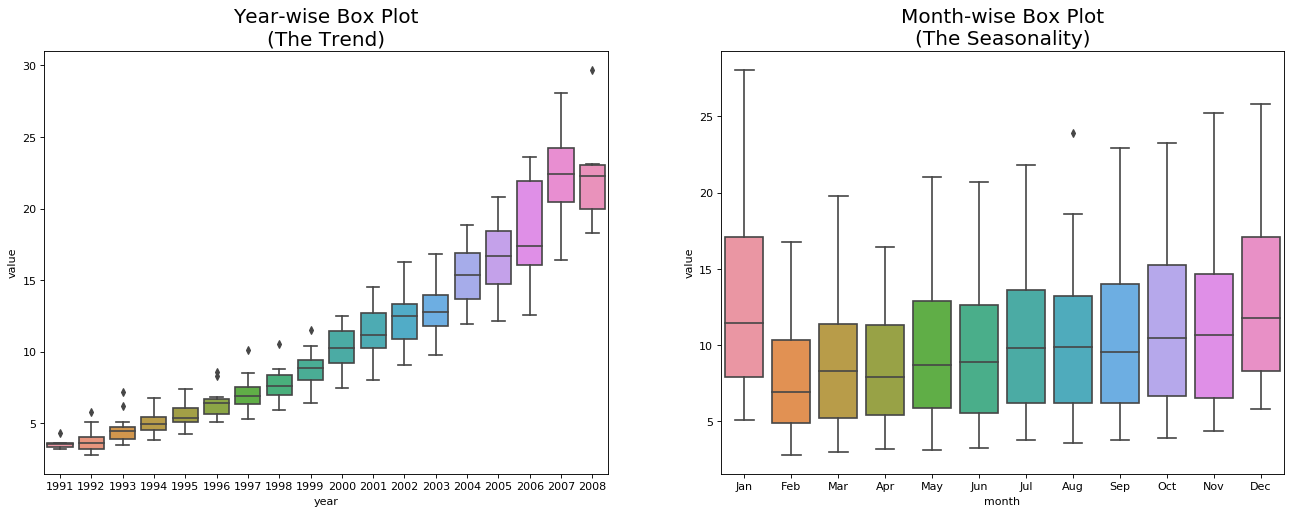

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df_diabetic, ax=axes[0])
sns.boxplot(x='month', y='value', data=df_diabetic.loc[~df_diabetic.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

## Patterns in a time series
Any time series may be split into the following components: Base Level + Trend + Seasonality + Error

A trend is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

Cyclic behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. 

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

* Additive time series:
> Value = Base Level + Trend + Seasonality + Error
* Multiplicative Time Series:
> Value = Base Level x Trend x Seasonality x Error

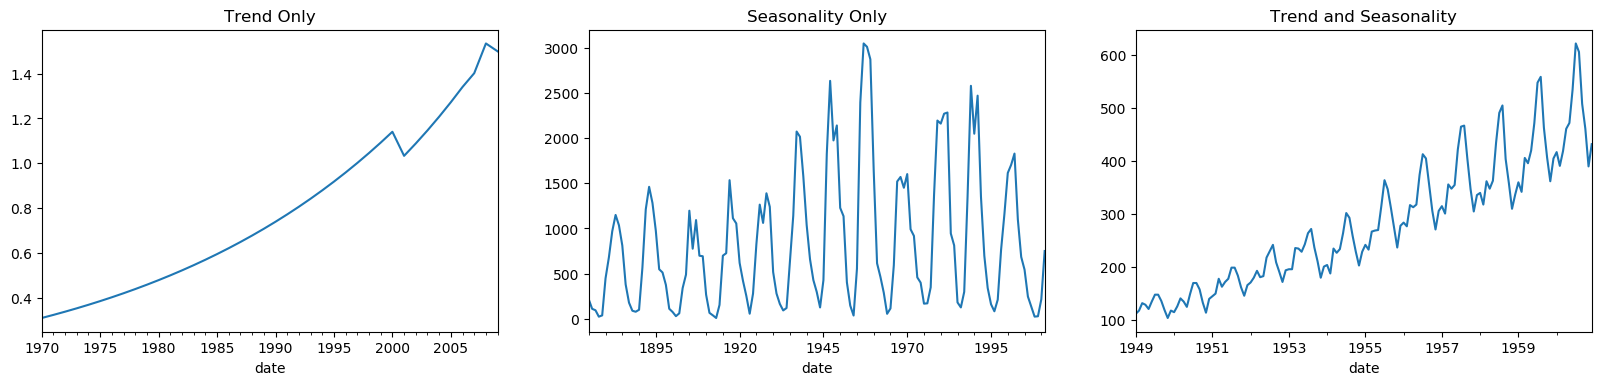

In [32]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], 
            index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], 
            index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], 
            index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

### Decomposition of time series
You can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The seasonal_decompose in statsmodels implements this conveniently.

In [33]:
# tsa = time series analysis
# Seasonal decomposition using moving averages.
# This is a naive decomposition. More sophisticated methods should be preferred.
# The results are obtained by first estimating the trend by applying a convolution filter to the data. 
# The trend is then removed from the series and the average of this de-trended series for each period 
# is the returned seasonal component.
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [34]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_diabetic['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_diabetic['value'], model='additive', extrapolate_trend='freq')

# Setting extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the 
# beginning of the series.

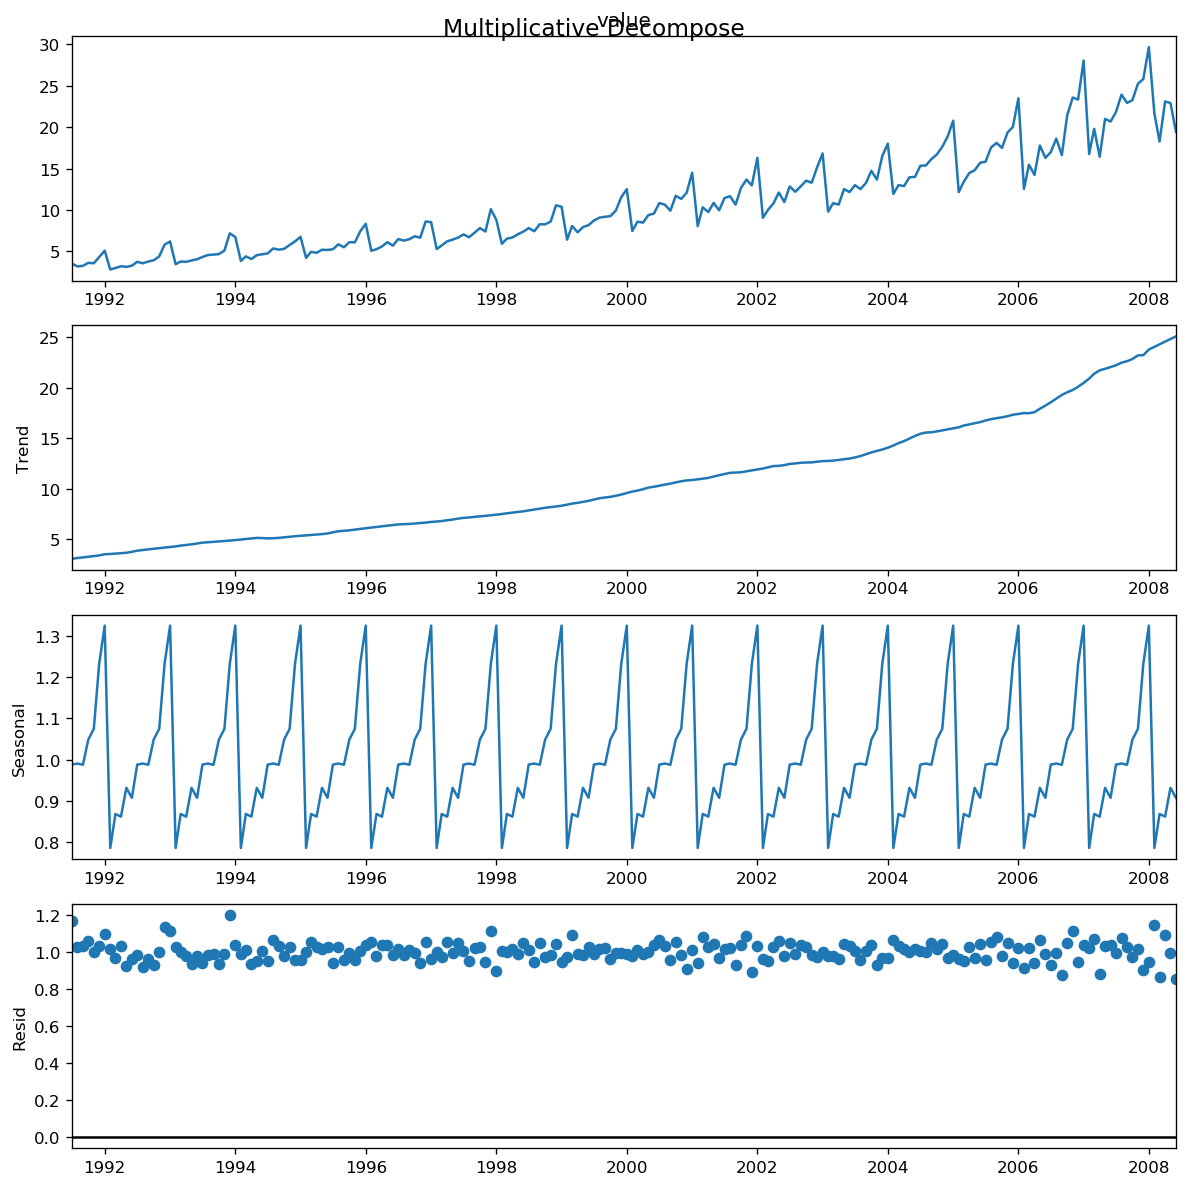

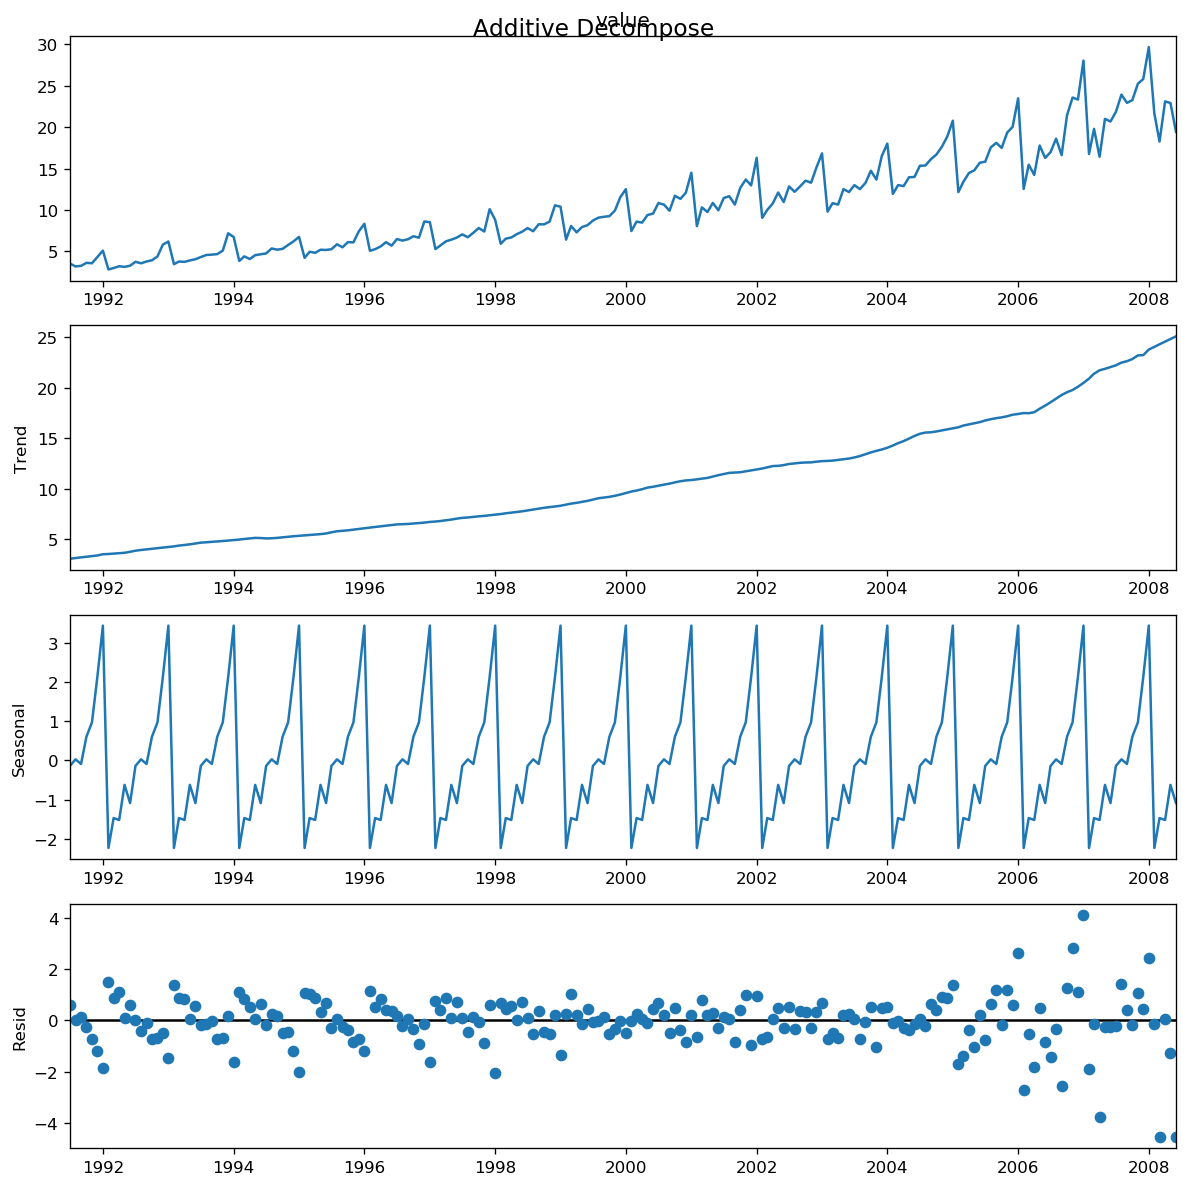

In [37]:
# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=14)
result_add.plot().suptitle('Additive Decompose', fontsize=14)
plt.show()

In [38]:
# NOTE: If you look at the residuals of the additive decomposition closely, it has some pattern left over. 
# The multiplicative decomposition, however, looks quite random which is good. 
# So ideally, multiplicative decomposition should be preferred for THIS particular series.

# The numerical output of the trend, seasonal and residual components are stored in the result_mul output 
# of statsmodels.seasonal_decompose
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

#If you check, the product of seas, trend and resid columns should exactly equal to the actual_values!!!!

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869
